In [19]:
%matplotlib inline

import d2lzh as d2l
from mxnet import autograd, gluon, nd
from mxnet.gluon import data as gdata, loss as gloss, nn

In [20]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = nd.random.normal(shape=(n_train + n_test, 1))
poly_features = nd.concat(features, nd.power(features, 2), nd.power(features, 3))
labels = (true_w[0] + poly_features[:, 0] + true_w[1] * poly_features[:, 1])
labels += nd.random.normal(scale=0.1, shape=labels.shape)

In [21]:
features[:2], poly_features[:2], labels[:2]

(
 [[-0.33182386]
  [ 0.49453422]]
 <NDArray 2x1 @cpu(0)>,
 
 [[-0.33182386  0.11010707 -0.03653615]
  [ 0.49453422  0.2445641   0.12094532]]
 <NDArray 2x3 @cpu(0)>,
 
 [0.4570112  0.84917766]
 <NDArray 2 @cpu(0)>)

In [22]:
def semilogy(x_vals, y_vals, x_label,y_label, x2_vals=None, y2_vals=None, legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

In [23]:
num_epochs, loss = 100, gloss.L2Loss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize()
    batch_size = min(10, train_labels.shape[0])
    train_iter = gdata.DataLoader(gdata.ArrayDataset(
        train_features, train_labels,), batch_size, shuffle=True)
    trainer = gluon.Trainer(net.collect_params(), 'sgd',
                           { 'learning_rate': 0.01 })
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        train_ls.append(loss(net(train_features),
                            train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features),
                           test_labels).mean().asscalar())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
            range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net[0].weight.data().asnumpy(),
             '\nbias:', net[0].bias.data().asnumpy())

final epoch: train loss 0.0053938376 test loss 0.0074261534
weight: [[ 0.93005276 -3.382151    0.01904716]] 
bias: [1.1698066]


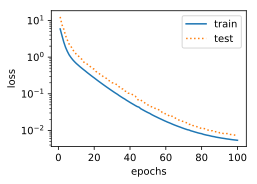

In [26]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :],
            labels[:n_train], labels[n_train:])

final epoch: train loss 10.397137 test loss 16.519493
weight: [[2.1385372]] 
bias: [-2.2427194]


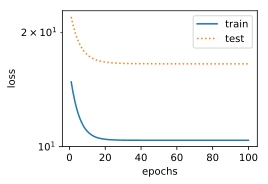

In [27]:
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train], labels[n_train:])

final epoch: train loss 0.039061815 test loss 25.187412
weight: [[ 0.07830025  0.05120679 -0.01958015]] 
bias: [0.41057837]


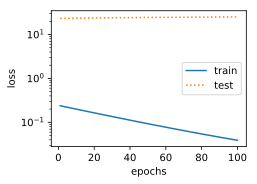

In [28]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2], labels[n_train:])